<a href="https://colab.research.google.com/github/Ebonica/EBONICA-SALETH-CVIP-Data-Science-/blob/main/EMAIL_SPAM_DETECTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix
from sklearn.svm import SVC
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier

In [ ]:
pip install seaborn

In [ ]:
email_data = pd.read_csv('spam.csv', encoding='latin-1')

In [ ]:
email_data

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [ ]:
email_data = email_data.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'])

In [ ]:
email_data

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ã¼ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


**DATA ANALYSIS**

In [ ]:
print("Column Names: \n\n",email_data.columns)

Column Names: 

 Index(['v1', 'v2'], dtype='object')


In [ ]:
print("Shape: \n\n",email_data.shape)

Shape: 

 (5572, 2)


In [ ]:
nan_rows = email_data[email_data.isna().any(axis=1)]

In [ ]:
print("Rows containing NaN values:")
print(nan_rows)


email_data.dropna(inplace=True)

Rows containing NaN values:
Empty DataFrame
Columns: [v1, v2]
Index: []


In [ ]:
print("Head: \n\n",email_data.head())

Head: 

      v1                                                 v2
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...


In [ ]:
print("Tail: \n\n",email_data.tail())

Tail: 

         v1                                                 v2
5567  spam  This is the 2nd time we have tried 2 contact u...
5568   ham              Will Ì_ b going to esplanade fr home?
5569   ham  Pity, * was in mood for that. So...any other s...
5570   ham  The guy did some bitching but I acted like i'd...
5571   ham                         Rofl. Its true to its name


In [ ]:
email_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [ ]:
email_data.dtypes

v1    object
v2    object
dtype: object

In [ ]:
email_data.describe()

,v1,v2
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [ ]:
email_data.isnull().sum()

v1    0
v2    0
dtype: int64

In [ ]:
email_data.iloc[8]

v1                                                 spam
v2    WINNER!! As a valued network customer you have...
Name: 8, dtype: object

In [ ]:
columns_of_interest = ['v1', 'v2']


unique_values = email_data[columns_of_interest].nunique()


count_unique_values = email_data[columns_of_interest].apply(lambda x: x.nunique())

value_counts = email_data[columns_of_interest].apply(pd.Series.value_counts)

print("Unique Values:")
print(unique_values)
print("\nCount of Unique Values:")
print(count_unique_values)
print("\nValue Counts:")
print(value_counts)

Unique Values:
v1       2
v2    5169
dtype: int64

Count of Unique Values:
v1       2
v2    5169
dtype: int64

Value Counts:
                                                    v1   v2
 &lt;#&gt;  in mca. But not conform.               NaN  1.0
 &lt;#&gt;  mins but i had to stop somewhere fi... NaN  1.0
 &lt;DECIMAL&gt; m but its not a common car her... NaN  1.0
 and  picking them up from various points          NaN  1.0
 came to look at the flat, seems ok, in his 50s... NaN  1.0
...                                                 ..  ...
ÌÏ still got lessons?  ÌÏ in sch?                  NaN  1.0
ÌÏ takin linear algebra today?                     NaN  1.0
ÌÏ thk of wat to eat tonight.                      NaN  1.0
ÌÏ v ma fan...                                     NaN  1.0
ÌÏ wait 4 me in sch i finish ard 5..               NaN  1.0

[5171 rows x 2 columns]


**DATA VISUALIZATION**

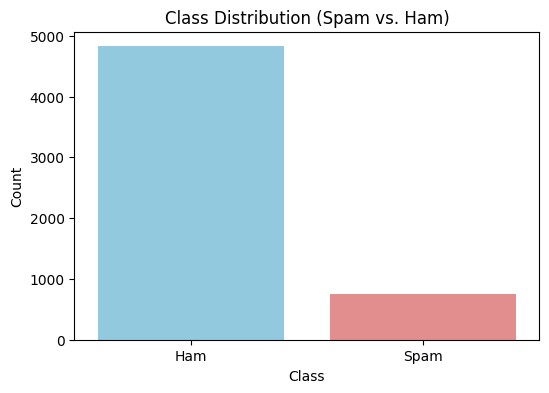

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(x= email_data['v1'], palette=['skyblue', 'lightcoral'])
plt.title('Class Distribution (Spam vs. Ham)')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks([0, 1], ['Ham', 'Spam'])
plt.show()

In [ ]:
from wordcloud import WordCloud

spam_text = " ".join(email_data[email_data['v1'] == 'spam']['v2'])
ham_text = " ".join(email_data[email_data['v1'] == 'ham']['v2'])


spam_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(spam_text)


ham_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(ham_text)

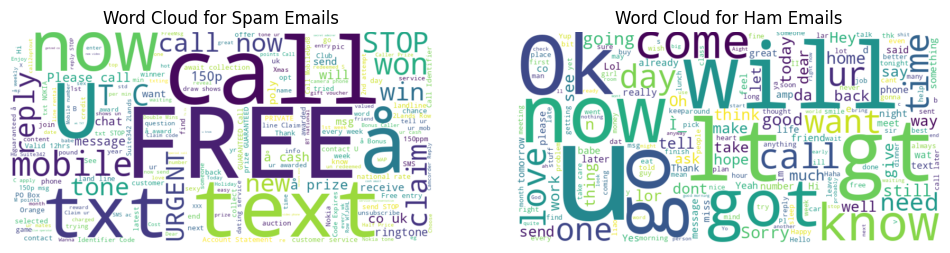

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(spam_wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Spam Emails')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(ham_wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Ham Emails')
plt.axis('off')

plt.show()


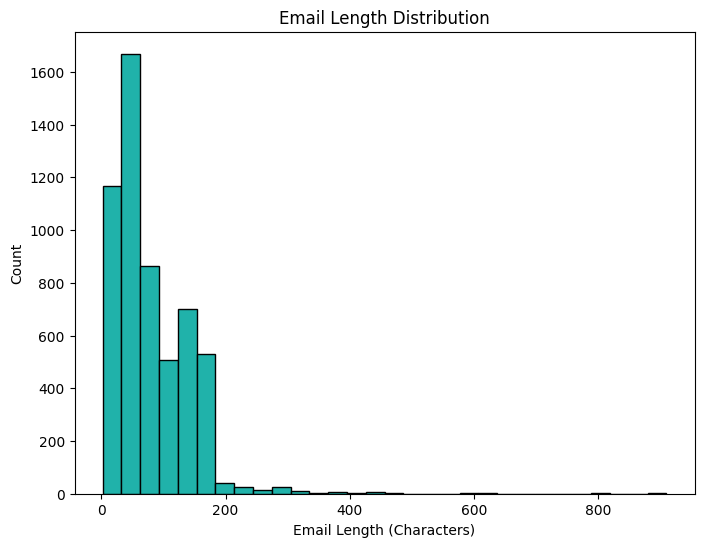

In [ ]:
email_lengths = [len(text) for text in email_data['v2']]

plt.figure(figsize=(8, 6))
plt.hist(email_lengths, bins=30, color='lightseagreen', edgecolor='black')
plt.title('Email Length Distribution')
plt.xlabel('Email Length (Characters)')
plt.ylabel('Count')
plt.show()

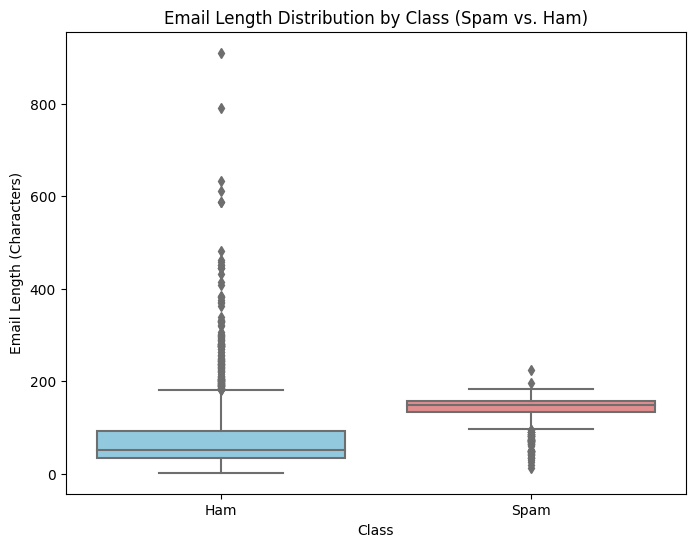

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=email_data['v1'], y=email_data['v2'].apply(len), palette=['skyblue', 'lightcoral'])
plt.title('Email Length Distribution by Class (Spam vs. Ham)')
plt.xlabel('Class')
plt.ylabel('Email Length (Characters)')
plt.xticks([0, 1], ['Ham', 'Spam'])
plt.show()


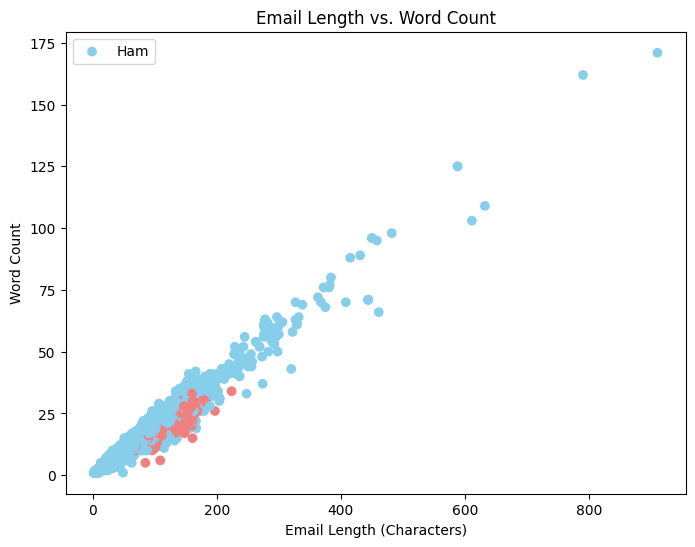

In [ ]:
word_counts = [len(text.split()) for text in email_data['v2']]

plt.figure(figsize=(8, 6))
plt.scatter(email_data['v2'].apply(len), word_counts, c=email_data['v1'].map({'ham': 'skyblue', 'spam': 'lightcoral'}))
plt.title('Email Length vs. Word Count')
plt.xlabel('Email Length (Characters)')
plt.ylabel('Word Count')
plt.legend(['Ham', 'Spam'])
plt.show()

**BUILDING MODELS**

**EMAIL SPAM DETECTION USING NAIVE BAYES ALGORITHM**

In [ ]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(email_data['v2'])
y = email_data['v1']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = MultinomialNB()


model.fit(X_train, y_train)


y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(classification_report(y_test, y_pred))
confusion_NB = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", confusion_NB)



Accuracy: 0.97847533632287
              precision    recall  f1-score   support

         ham       0.99      0.99      0.99       965
        spam       0.91      0.93      0.92       150

    accuracy                           0.98      1115
   macro avg       0.95      0.96      0.95      1115
weighted avg       0.98      0.98      0.98      1115


Confusion Matrix:
 [[952  13]
 [ 11 139]]


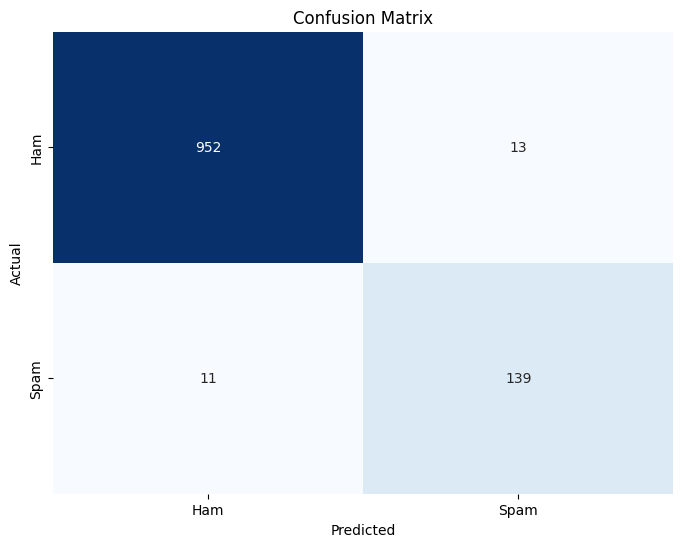

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_NB, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

**EMAIL SPAM DETECTION USING SUPPORT VECTOR MACHINE**

In [ ]:
svmx = email_data['v2']
svmy = email_data['v1']

svmx_train, svmx_test, svmy_train, svmtest_y = train_test_split(svmx, svmy, test_size=0.2, random_state=42)

In [ ]:
vectorizer = TfidfVectorizer(max_features=5000)
X_train_vec = vectorizer.fit_transform(svmx_train)
X_test_vec = vectorizer.transform(svmx_test)


In [ ]:
svm_classifier = SVC(kernel='linear', C=1)
svm_classifier.fit(X_train_vec, svmy_train)

SVC(C=1, kernel='linear')

In [ ]:
pred = svm_classifier.predict(X_test_vec)


In [ ]:
accuracy = accuracy_score(svmtest_y, pred)
confusion = confusion_matrix(svmtest_y, pred)
classification_rep = classification_report(svmtest_y, pred)

print("Accuracy:", accuracy)
print("\nConfusion Matrix:\n", confusion)
print("\nClassification Report:\n", classification_rep)


Accuracy: 0.9829596412556054

Confusion Matrix:
 [[963   2]
 [ 17 133]]

Classification Report:
               precision    recall  f1-score   support

         ham       0.98      1.00      0.99       965
        spam       0.99      0.89      0.93       150

    accuracy                           0.98      1115
   macro avg       0.98      0.94      0.96      1115
weighted avg       0.98      0.98      0.98      1115



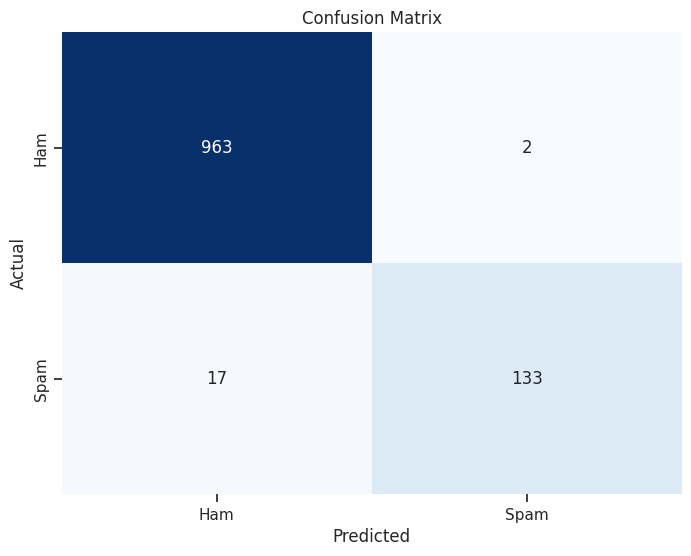

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(confusion , annot=True, fmt='d', cmap='Blues', cbar=False,xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


**EMAIL SPAM DETECTION USING RANDOM FOREST**

In [ ]:
text = email_data['v2']
label = email_data['v1']


ranx_train, ranx_test, rany_train, rany_test = train_test_split(text, label, test_size=0.2, random_state=42)


vectorizer = CountVectorizer()
X_train_vector = vectorizer.fit_transform(ranx_train)
X_test_vector = vectorizer.transform(ranx_test)


rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)


rf_classifier.fit(X_train_vector, rany_train)


pred_y = rf_classifier.predict(X_test_vector)


accuracy = accuracy_score(rany_test, pred_y)
print(f"Accuracy: {accuracy:.2f}")


print("Classification Report:")
print(classification_report(rany_test, pred_y))


conf_matrix = confusion_matrix(rany_test, pred_y)
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.98
Classification Report:
              precision    recall  f1-score   support

         ham       0.97      1.00      0.99       965
        spam       1.00      0.82      0.90       150

    accuracy                           0.98      1115
   macro avg       0.99      0.91      0.94      1115
weighted avg       0.98      0.98      0.97      1115

Confusion Matrix:
[[965   0]
 [ 27 123]]


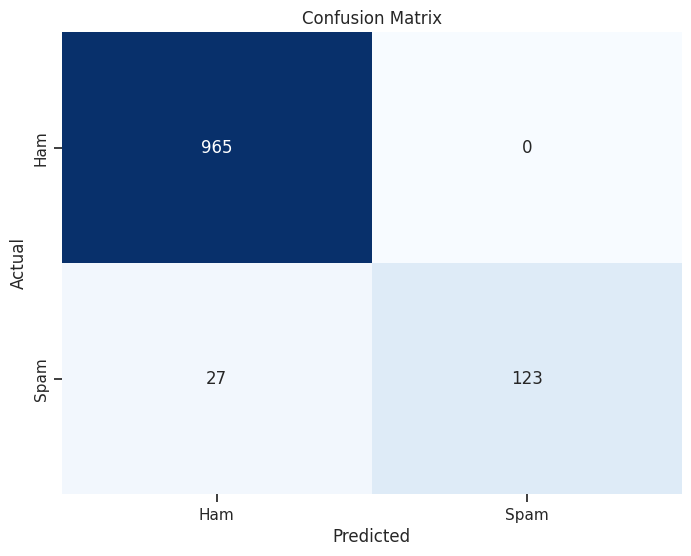

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
